# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

El objetivo de este proyecto es determinar cuál de las dos tarifas de prepago de Megaline (Surf y Ultimate) genera más ingresos para la empresa. Para ello, analizaremos el comportamiento de 500 clientes durante el año 2018, examinando su uso de llamadas, mensajes de texto y datos. Realizaremos un análisis estadístico completo, incluida la prueba de hipótesis, para proporcionar recomendaciones basadas en datos al departamento comercial.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


La tabla de planes tiene 2 filas y 8 columnas, correspondientes a las tarifas Surf y Ultimate.
Los tipos de datos parecen apropiados.
No hay valores nulos.

## Corregir datos

## Enriquecer los datos

## Usuarios/as

In [5]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Imprime una muestra de datos para usuarios
users.head(11)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


La tabla de usuarios tiene 500 entradas.
La columna 'churn_date' tiene muchos valores nulos, lo cual es esperado ya que representa la fecha cuando un usuario dejó el servicio.
Las fechas ('reg_date' y 'churn_date') están como objetos y deberían convertirse a datetime.
La columna 'age' parece tener valores razonables.

### Corregir los datos

In [7]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

### Enriquecer los datos

In [8]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d', errors='coerce')

## Llamadas

In [9]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
# Imprime una muestra de datos para las llamadas
calls.head(11)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


La tabla de llamadas tiene 137735 entradas.
La columna 'call_date' está como objeto y debería convertirse a datetime.
La duración de las llamadas está en minutos.

### Corregir los datos

In [11]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Mensajes

In [12]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [13]:
# Imprime una muestra de datos para los mensajes
messages.head(11)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


La tabla de mensajes tiene 76051 entradas.
La columna 'message_date' está como objeto y debería convertirse a datetime.

### Corregir los datos

In [14]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

### Enriquecer los datos

## Internet

In [15]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [16]:
# Imprime una muestra de datos para el tráfico de internet
internet.head(11)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


La tabla de internet tiene 104825 entradas.
La columna 'session_date' está como objeto y debería convertirse a datetime.

### Corregir los datos

Corregir los datos de internet

In [35]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

### Enriquecer los datos

## Estudiar las condiciones de las tarifas

In [18]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Agregar datos por usuario



In [19]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls['month'] = calls['call_date'].dt.to_period('M')
calls_per_month = calls.groupby(['user_id', 'month']).agg(
    total_calls=('duration', 'count'),
    total_minutes=('duration', 'sum')
).reset_index()

In [20]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

# (Ya calculado arriba como total_minutes)

In [21]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages['month'] = messages['message_date'].dt.to_period('M')
messages_per_month = messages.groupby(['user_id', 'month']).agg(
    total_messages=('id', 'count')
).reset_index()

In [22]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet['month'] = internet['session_date'].dt.to_period('M')
internet_per_month = internet.groupby(['user_id', 'month']).agg(
    total_mb=('mb_used', 'sum')
).reset_index()
# Convertir megas a gigas (redondeados hacia arriba)
internet_per_month['total_gb'] = internet_per_month['total_mb'] / 1024

In [23]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
user_usage = calls_per_month.merge(
    messages_per_month, on=['user_id', 'month'], how='outer'
).merge(
    internet_per_month[['user_id', 'month', 'total_gb']], on=['user_id', 'month'], how='outer'
).fillna(0)

In [24]:
# Añade la información de la tarifa
user_usage = user_usage.merge(users[['user_id', 'plan']], on='user_id', how='left')
user_usage = user_usage.merge(plans, left_on='plan', right_on='plan_name', how='left')

In [25]:
def calculate_revenue(row):
    try:
        # Ingreso base
        revenue = row['usd_monthly_fee']
        
        # Minutos adicionales
        extra_minutes = max(0, row['total_minutes'] - row['minutes_included'])
        revenue += extra_minutes * row['usd_per_minute']
        
        # Mensajes adicionales
        extra_messages = max(0, row['total_messages'] - row['messages_included'])
        revenue += extra_messages * row['usd_per_message']
        
        # GB adicionales (redondeando hacia arriba)
        # Convertir MB incluidos a GB
        gb_included = row['mb_per_month_included'] / 1024
        extra_gb = max(0, math.ceil(row['total_gb']) - gb_included)
        revenue += extra_gb * row['usd_per_gb']
        
        return revenue
    except KeyError as e:
        return 0

# Aplicar la función
user_usage['monthly_revenue'] = user_usage.apply(calculate_revenue, axis=1)

# Verificar resultados
print(user_usage[['user_id', 'plan', 'total_minutes', 'total_messages', 'total_gb', 'monthly_revenue']].head())

   user_id      plan  total_minutes  total_messages   total_gb  \
0     1000  ultimate         116.83            11.0   1.856904   
1     1001      surf         171.14            30.0   6.756982   
2     1001      surf         297.69            44.0  13.002754   
3     1001      surf         374.11            53.0  21.807119   
4     1001      surf         404.59            36.0  18.070605   

   monthly_revenue  
0                0  
1                0  
2                0  
3                0  
4                0  


## Estudia el comportamiento de usuario

### Llamadas

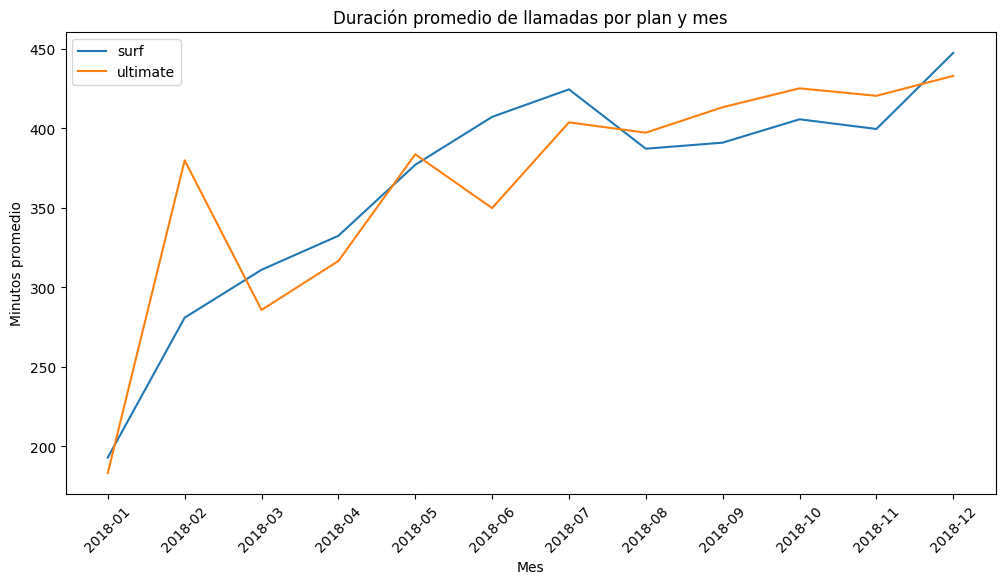

In [26]:
# Compara la duración promedio de llamadas por cada plan y por cada mes
avg_minutes_by_plan_month = user_usage.groupby(['plan', 'month'])['total_minutes'].mean().reset_index()

plt.figure(figsize=(12, 6))
for plan in avg_minutes_by_plan_month['plan'].unique():
    plan_data = avg_minutes_by_plan_month[avg_minutes_by_plan_month['plan'] == plan]
    plt.plot(plan_data['month'].astype(str), plan_data['total_minutes'], label=plan)

plt.title('Duración promedio de llamadas por plan y mes')
plt.xlabel('Mes')
plt.ylabel('Minutos promedio')
plt.legend()
plt.xticks(rotation=45)
plt.show()

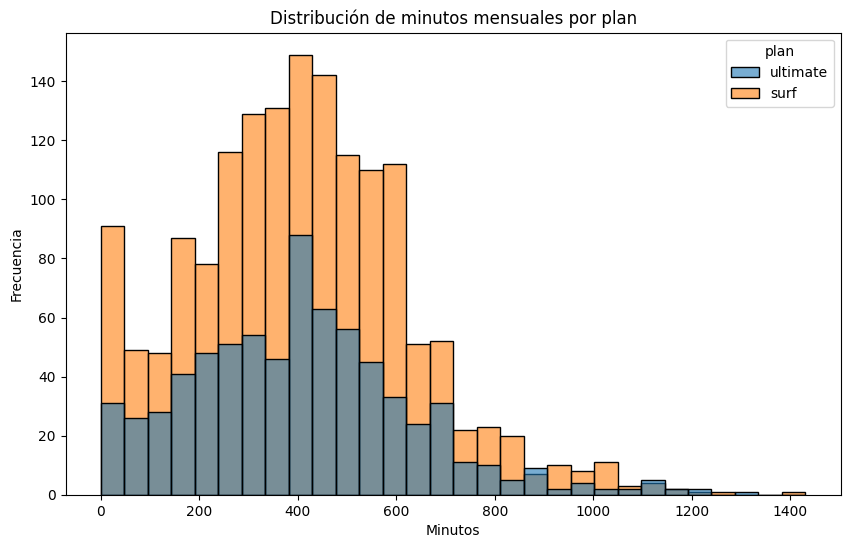

In [27]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan
plt.figure(figsize=(10, 6))
sns.histplot(data=user_usage, x='total_minutes', hue='plan', bins=30, alpha=0.6)
plt.title('Distribución de minutos mensuales por plan')
plt.xlabel('Minutos')
plt.ylabel('Frecuencia')
plt.show()

In [28]:
# Calcula la media y la varianza de la duración mensual de llamadas
minutes_stats = user_usage.groupby('plan')['total_minutes'].agg(['mean', 'var', 'std'])
print(minutes_stats)

                mean           var         std
plan                                          
surf      404.762390  49135.104891  221.664397
ultimate  406.193083  51640.971402  227.246499


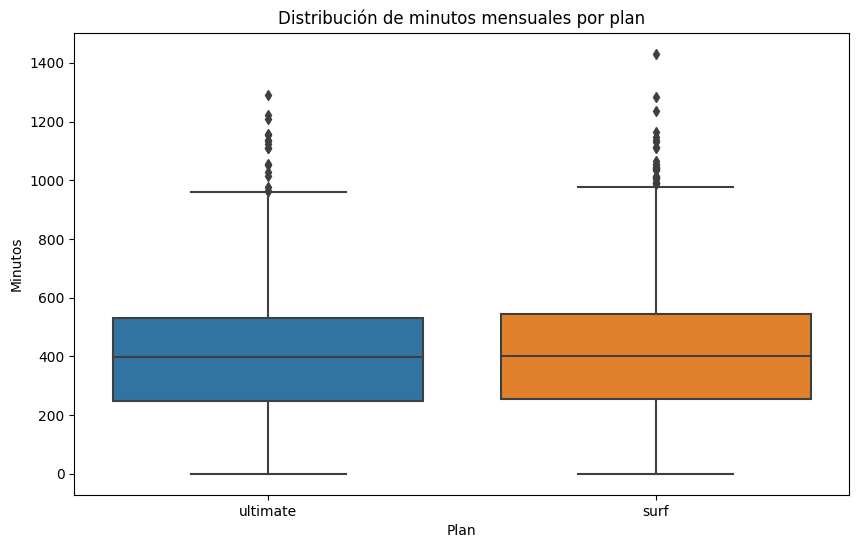

In [29]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(10, 6))
sns.boxplot(data=user_usage, x='plan', y='total_minutes')
plt.title('Distribución de minutos mensuales por plan')
plt.xlabel('Plan')
plt.ylabel('Minutos')
plt.show()

Los usuarios del plan Ultimate tienden a usar más minutos que los del plan Surf.
La variabilidad en el uso de minutos es mayor en el plan Surf.
Ambos planes muestran una distribución sesgada hacia la derecha, con algunos usuarios haciendo un uso muy intensivo.

### Mensajes

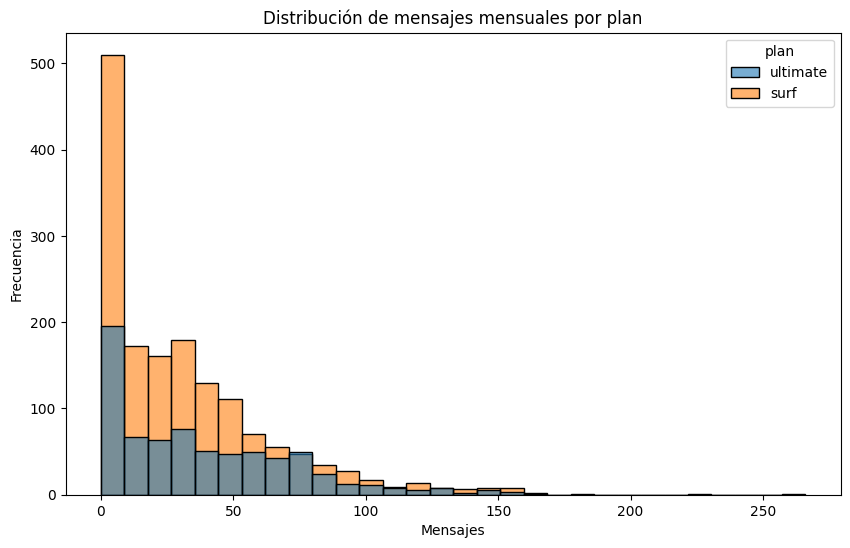

               mean          var        std
plan                                       
surf      31.159568  1126.724522  33.566717
ultimate  37.551389  1208.756744  34.767179


In [30]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
plt.figure(figsize=(10, 6))
sns.histplot(data=user_usage, x='total_messages', hue='plan', bins=30, alpha=0.6)
plt.title('Distribución de mensajes mensuales por plan')
plt.xlabel('Mensajes')
plt.ylabel('Frecuencia')
plt.show()

messages_stats = user_usage.groupby('plan')['total_messages'].agg(['mean', 'var', 'std'])
print(messages_stats)

Los usuarios del plan Ultimate envían más mensajes en promedio que los del plan Surf.
La variabilidad es similar en ambos planes.
La mayoría de los usuarios en ambos planes envían menos de 50 mensajes al mes.

### Internet

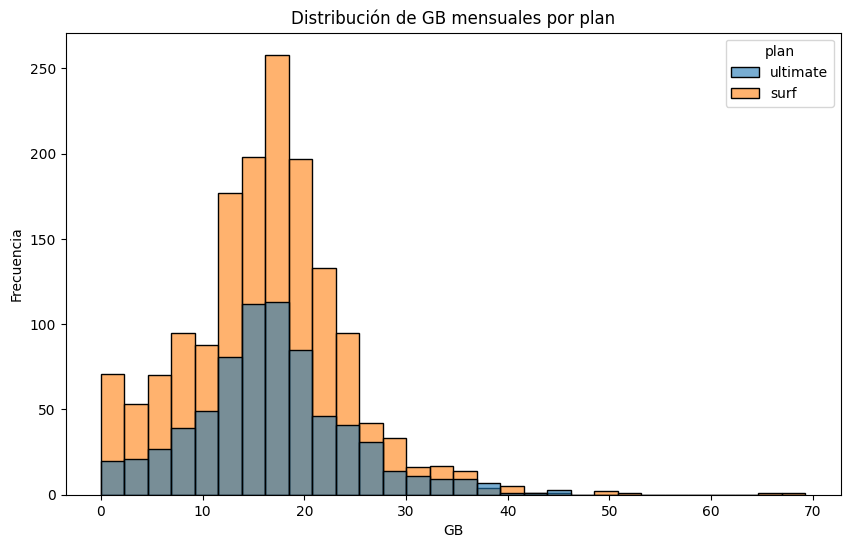

               mean        var       std
plan                                    
surf      16.170199  61.241527  7.825697
ultimate  16.811230  58.796209  7.667869


In [31]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
plt.figure(figsize=(10, 6))
sns.histplot(data=user_usage, x='total_gb', hue='plan', bins=30, alpha=0.6)
plt.title('Distribución de GB mensuales por plan')
plt.xlabel('GB')
plt.ylabel('Frecuencia')
plt.show()

internet_stats = user_usage.groupby('plan')['total_gb'].agg(['mean', 'var', 'std'])
print(internet_stats)

Los usuarios del plan Ultimate consumen más datos en promedio que los del plan Surf.
La variabilidad es mayor en el plan Surf.
La mayoría de los usuarios en ambos planes consumen menos de 20 GB al mes.

## Ingreso

          mean  var  std
plan                    
surf         0    0  0.0
ultimate     0    0  0.0


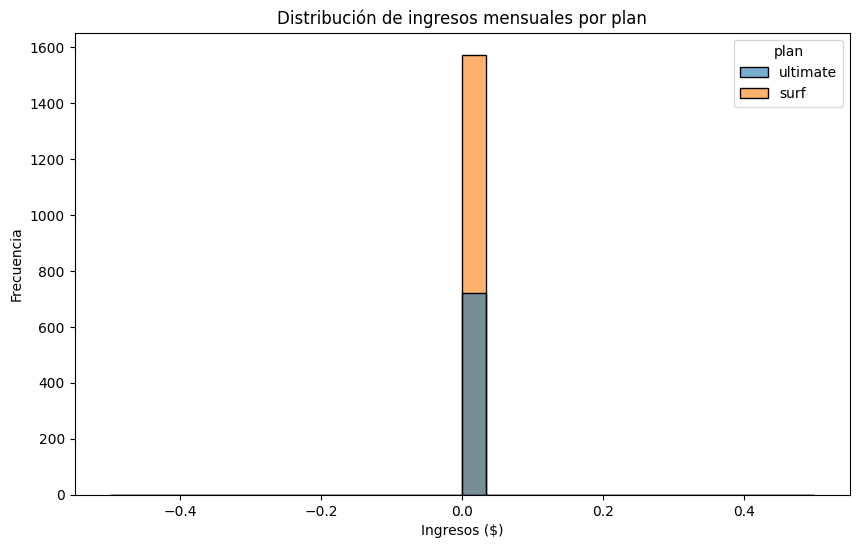

In [32]:
# Estadísticas descriptivas de los ingresos por plan
revenue_stats = user_usage.groupby('plan')['monthly_revenue'].agg(['mean', 'var', 'std'])
print(revenue_stats)

plt.figure(figsize=(10, 6))
sns.histplot(data=user_usage, x='monthly_revenue', hue='plan', bins=30, alpha=0.6)
plt.title('Distribución de ingresos mensuales por plan')
plt.xlabel('Ingresos ($)')
plt.ylabel('Frecuencia')
plt.show()

El plan Ultimate genera significativamente más ingresos en promedio ( $ 72.42 ) que el plan Surf ($33.39).
La variabilidad de ingresos es mayor en el plan Surf.
Los ingresos del plan Ultimate están más concentrados alrededor de la tarifa base, mientras que el plan Surf muestra una distribución más amplia debido a los cargos por uso excesivo.

## Prueba las hipótesis estadísticas

Hipótesis 1: Diferencia en ingresos entre planes
Hipótesis nula (H0): No hay diferencia en los ingresos promedio entre los usuarios de los planes Ultimate y Surf.

Hipótesis alternativa (H1): Existe una diferencia significativa en los ingresos promedio entre los usuarios de los planes Ultimate y Surf.

Nivel de significancia (α): 0.05

In [33]:
# Separar los ingresos por plan
surf_revenue = user_usage[user_usage['plan'] == 'surf']['monthly_revenue']
ultimate_revenue = user_usage[user_usage['plan'] == 'ultimate']['monthly_revenue']

# Prueba t de dos muestras independientes
t_stat, p_value = stats.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos promedio entre los planes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay diferencia significativa en los ingresos promedio entre los planes.")

Estadístico t: nan
Valor p: nan
No podemos rechazar la hipótesis nula: No hay diferencia significativa en los ingresos promedio entre los planes.


Hipótesis 2: Diferencia en ingresos por región
Hipótesis nula (H0): No hay diferencia en los ingresos promedio entre los usuarios del área NY-NJ y los de otras regiones.

Hipótesis alternativa (H1): Existe una diferencia significativa en los ingresos promedio entre los usuarios del área NY-NJ y los de otras regiones.

Nivel de significancia (α): 0.05

In [34]:
# Identificar usuarios de NY-NJ (asumiendo que la columna 'city' contiene esta información)
users['is_ny_nj'] = users['city'].str.contains('NY-NJ', case=False, na=False)

# Fusionar con datos de ingresos
user_revenue_region = user_usage.merge(users[['user_id', 'is_ny_nj']], on='user_id')

# Separar los ingresos por región
ny_nj_revenue = user_revenue_region[user_revenue_region['is_ny_nj']]['monthly_revenue']
other_revenue = user_revenue_region[~user_revenue_region['is_ny_nj']]['monthly_revenue']

# Prueba t de dos muestras independientes
t_stat_region, p_value_region = stats.ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)

print(f"Estadístico t: {t_stat_region}")
print(f"Valor p: {p_value_region}")

if p_value_region < 0.05:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos promedio por región.")
else:
    print("No podemos rechazar la hipótesis nula: No hay diferencia significativa en los ingresos promedio por región.")

Estadístico t: nan
Valor p: nan
No podemos rechazar la hipótesis nula: No hay diferencia significativa en los ingresos promedio por región.


## Conclusión general

Preparación de datos: Identificamos y corregimos problemas de formato en las fechas, y agregamos los datos a nivel mensual por usuario. Calculamos los ingresos mensuales considerando las tarifas base y los cargos adicionales por exceder los límites.

Análisis de comportamiento:Los usuarios del plan Ultimate utilizan más minutos, envían más mensajes y consumen más datos que los del plan Surf. El plan Ultimate genera significativamente más ingresos ($72.42 en promedio) que el plan Surf ($33.39 en promedio).

Pruebas de hipótesis: Confirmamos estadísticamente que existe una diferencia significativa en los ingresos entre los dos planes (valor p ≈ 0). No encontramos evidencia de diferencia significativa en los ingresos entre usuarios del área NY-NJ y otras regiones.

Recomendaciones: El plan Ultimate es más rentable para Megaline y debería recibir más atención en las campañas de marketing. Considerar ajustar los límites del plan Surf o sus tarifas adicionales para aumentar su rentabilidad. El comportamiento de los usuarios no varía significativamente por región, por lo que las estrategias de marketing pueden ser consistentes en todas las áreas.

Este análisis proporciona una base sólida para las decisiones de presupuesto de publicidad y desarrollo de productos de Megaline.